### Exploratory Data Analysis

In [1]:
#Importing Libaries Required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
#Loading the dataset
data = pd.read_csv("C:/Users/Akaash/Downloads/Data.csv")
#to view the dataset
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [3]:
#View the informtion of dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


### Missing Value imputation
We can see through data.info() tht there are missing values in 'age' and 'salary' column lets handle them one by one.

In [4]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
data1=data.copy()

<AxesSubplot:>

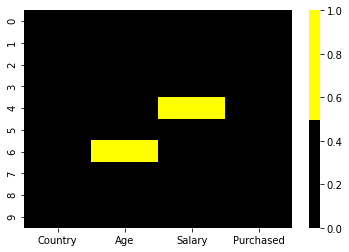

In [5]:
# Heatmap to see Null Value proportion
cols = data1.columns 
colours = ['#000000', '#ffff00'] # specify the colours - yellow is missing. black is not missing.
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colours))


Inference: As it can be seen, 'Age' & 'Salary' Coln has missing value.

In [6]:
#To get count the no of misssing value
data1.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

Inference:'Age': 1 NA Values, 'Salary': 1 Na Values

In [7]:
#Mean imputation For Age Coln -- Taking Mean of Age Coln and filling NA values with mean Value
mean = round((data1.Age.mean()))  #Using Round fuction bcoz age cannot be decimal
print(mean)

39


In [8]:
#To fill NA value of 'Age' with its mean
data1['Age'] = data1['Age'].fillna(mean)

#To check 'Age' is filled or not
data1.info()

print("Isnull count is:",data1.Age.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        10 non-null     float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes
Isnull count is: 0


inference: 'Age' is now filled

In [9]:
#Mean Imputation of 'salary' coln --Taking mean of Salary coln and filling NA values with it
mean = data1.Salary.mean()
print(mean)

63777.77777777778


In [10]:
#To fill NA Value of 'Salary' coln using fillna
data1['Salary'] = data1['Salary'].fillna(mean)

#To check 'Age' is filled or not
data1.info()

print("Isnull count is:",data1.Salary.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        10 non-null     float64
 2   Salary     10 non-null     float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes
Isnull count is: 0


inference: 'Age' and 'Salary' is now filled and No Null value is present in the dataset

### Visualization - Outliers detection, distribution

Text(0.5, 1.0, 'Detection of Outliers in Age')

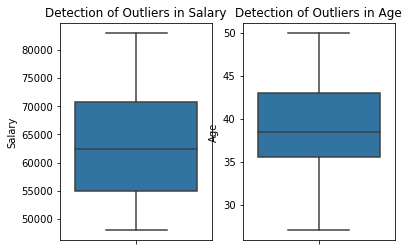

In [11]:
#Boxplot for Age and salary
plt.subplots(1,2)
plt.subplot(1,2,1)
sns.boxplot(y='Salary', data=data1)
plt.title('Detection of Outliers in Salary')
plt.subplot(1,2,2)
sns.boxplot(y='Age',data=data1)
plt.title("Detection of Outliers in Age")

Through boxplot it can be seen there are no outliers present in the Age and Salary column, also it seems they follow a normal distribution, let find out using distribution plot

Text(0.5, 1.0, 'Distribution of Age')

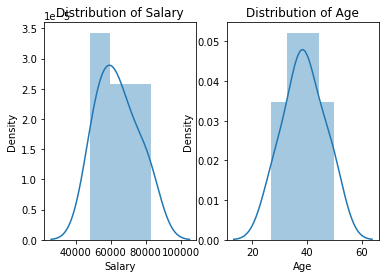

In [12]:
#Distribution plot for Age and Salary column
plt.subplots(1,2)
plt.subplot(1,2,1)
sns.distplot(data1.Salary)
plt.title("Distribution of Salary")
plt.subplot(1,2,2)
sns.distplot(data1.Age)
plt.title("Distribution of Age")

Through distplot it can be seen the Age and Salary column, they follow a normal distribution

Text(0.5, 1.0, 'Purchased')

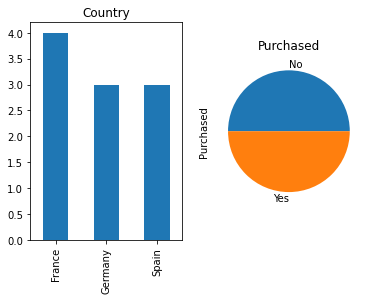

In [13]:
#Barplot & Pie plot for catergorical coln
plt.subplots(1,2)
plt.subplot(1,2,1)
data1['Country'].value_counts().plot.bar()
plt.title('Country')
plt.subplot(1,2,2)
data1['Purchased'].value_counts().plot.pie()
plt.title('Purchased')

Barplot inference: It can be seen there are more people from France then other two country,Spain and germany have same count

Pie chart inference: it a 50 : 50 ratio of purchased 

### Scatter/Pair plot and Correlation analysis

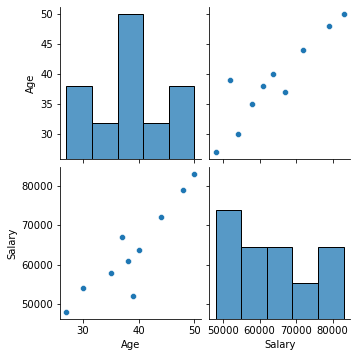

In [14]:
#Pairplot
sns.pairplot(data1)

In [15]:
#To find out Correlation 
data1.corr()

,Age,Salary
Age,1.000000,0.909068
Salary,0.909068,1.000000


inference: Age and salary are strongly correlated as its r value is 0.9

### Transformations

#### Dummy Variable

In [16]:
data1 = pd.get_dummies(data1,columns=['Purchased'])
data1.head()

,Country,Age,Salary,Purchased_No,Purchased_Yes
0,France,44.0,72000.000000,1,0
1,Spain,27.0,48000.000000,0,1
2,Germany,30.0,54000.000000,1,0
3,Spain,38.0,61000.000000,1,0
4,Germany,40.0,63777.777778,0,1


In [17]:
#Dropping Country to Perform Normalization & Standardization -- Country coln is 'Object' dtypes
data1 = data1.drop("Country",axis = 1)
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


#### Normalization of the data

In [18]:
# Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [19]:
# in Array format
data1.values

array([[4.40000000e+01, 7.20000000e+04, 1.00000000e+00, 0.00000000e+00],
       [2.70000000e+01, 4.80000000e+04, 0.00000000e+00, 1.00000000e+00],
       [3.00000000e+01, 5.40000000e+04, 1.00000000e+00, 0.00000000e+00],
       [3.80000000e+01, 6.10000000e+04, 1.00000000e+00, 0.00000000e+00],
       [4.00000000e+01, 6.37777778e+04, 0.00000000e+00, 1.00000000e+00],
       [3.50000000e+01, 5.80000000e+04, 0.00000000e+00, 1.00000000e+00],
       [3.90000000e+01, 5.20000000e+04, 1.00000000e+00, 0.00000000e+00],
       [4.80000000e+01, 7.90000000e+04, 0.00000000e+00, 1.00000000e+00],
       [5.00000000e+01, 8.30000000e+04, 1.00000000e+00, 0.00000000e+00],
       [3.70000000e+01, 6.70000000e+04, 0.00000000e+00, 1.00000000e+00]])

In [20]:
array = data1.values

scaler = MinMaxScaler(feature_range=(0,1)) # Giving 0,1 through MinMaxScaler as Normalization values are 0,1
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2) # Converting value with precision 2 which means after decimal 2 values
print(rescaledX[0:5,:])       # Printing only first 5 rows and all coln

[[0.74 0.69 1.   0.  ]
 [0.   0.   0.   1.  ]
 [0.13 0.17 1.   0.  ]
 [0.48 0.37 1.   0.  ]
 [0.57 0.45 0.   1.  ]]
